# TODO
- make the paths nice using https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f

## Preprocessing

In [8]:
from pathlib import Path
data_folder = Path("source_data/text_files/")

file_to_open = data_folder / "raw_data.txt"

In [9]:
data_folder

WindowsPath('source_data/text_files')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

%matplotlib inline
plt.style.use('ggplot')
    

## Functions

In [3]:
def dating_machine(df):
    "Takes a boring old DataFrame and returns the sexiest dates formatted in the coolest ways"
    df['month'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.month_name()
    df['month_n'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.month
    df['day'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.day_name()
    df['day_y'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.dayofyear
    df['day_w'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.dayofweek
    df['week_y'] = pd.to_datetime(arg=df.loc[:, 'date']).dt.weekofyear
    
    return df

The `coronavirustrends` folder contains 19 files for each of the subreddits in our shortlist. The subreddits are named by number so they can easily be looped over. 

# Coronavirus trends

In [23]:
# Point to directory containing data
DATA_DIR = 'C:\\Users\\delah\\Documents\\Programming\\workspace\\AAForB_Assignment4\\data'
ANALYSIS_DIR = '\\coronavirustrends'
INPUT_DIR = '\\input'
OUTPUT_DIR = '\\output'
VIS_DIR = 'C:\\Users\\delah\\Documents\\Programming\\workspace\\AAForB_Assignment4\\outputs\\exploratory_analysis\\coronatrends\\'


os.chdir(DATA_DIR + ANALYSIS_DIR + INPUT_DIR)

# Importing data and renaming columns
df = pd.DataFrame()
for i in range(1,20):
    temp = pd.read_csv(str(i))
    df = df.append(temp)
    
df = df.rename(columns={'p.title':'title','s.display_name':'subreddit','p.created_utc_str':'date','p.score':'score'})

# Extract subreddits
subreddits = list(set(df.loc[:,['subreddit']].values.flatten()))
print("Number of subreddits extracted:", len(list(subreddits)))
print(subreddits)

# Get months, weeks and days
df = dating_machine(df)

df.head()
                 

Number of subreddits extracted: 19
['politics', 'lifeprotips', 'dataisbeautiful', 'europe', 'covid19', 'explainlikeimfive', 'nottheonion', 'videos', 'coronavirus', 'iama', 'askscience', 'technology', 'upliftingnews', 'science', 'worldnews', 'askreddit', 'todayilearned', 'news', 'china_flu']


,title,subreddit,date,score,month,month_n,day,day_y,day_w,week_y
0,Redditors bored because coronavirus cancelled ...,askreddit,2020-03-13 15:17:31,3,March,3,Friday,73,4,11
1,Why would a second coronavirus wave breakout i...,askreddit,2020-04-13 05:58:50,1,April,4,Monday,104,0,16
2,What good things are happening right now but i...,askreddit,2020-04-15 00:10:04,1,April,4,Wednesday,106,2,16
3,"So now, what is the most memorable fake news y...",askreddit,2020-03-28 21:16:05,1,March,3,Saturday,88,5,13
4,people who had to use the health system during...,askreddit,2020-03-23 23:45:51,1,March,3,Monday,83,0,13


In [17]:
os.chdir(DATA_DIR + ANALYSIS_DIR + OUTPUT_DIR)
df.to_csv('coronavirus_trends.csv')

## Exploration

summary statistics

In [18]:
print(df.describe())
print()
print(df.info())

               score       month_n         day_y         day_w        week_y
count   32303.000000  32303.000000  32303.000000  32303.000000  32303.000000
mean      464.084543      3.276662     85.156982      2.952481     12.886357
std      3599.620684      0.700232     18.833352      1.966565      2.707421
min         0.000000      1.000000     14.000000      0.000000      3.000000
25%         1.000000      3.000000     75.000000      1.000000     11.000000
50%         4.000000      3.000000     87.000000      3.000000     13.000000
75%        33.000000      4.000000    101.000000      5.000000     15.000000
max    104082.000000      4.000000    114.000000      6.000000     17.000000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32303 entries, 0 to 76
Data columns (total 10 columns):
title        32303 non-null object
subreddit    32303 non-null object
date         32303 non-null object
score        32303 non-null int64
month        32303 non-null object
month_n      32303 non-nul

## Univariate Exploration

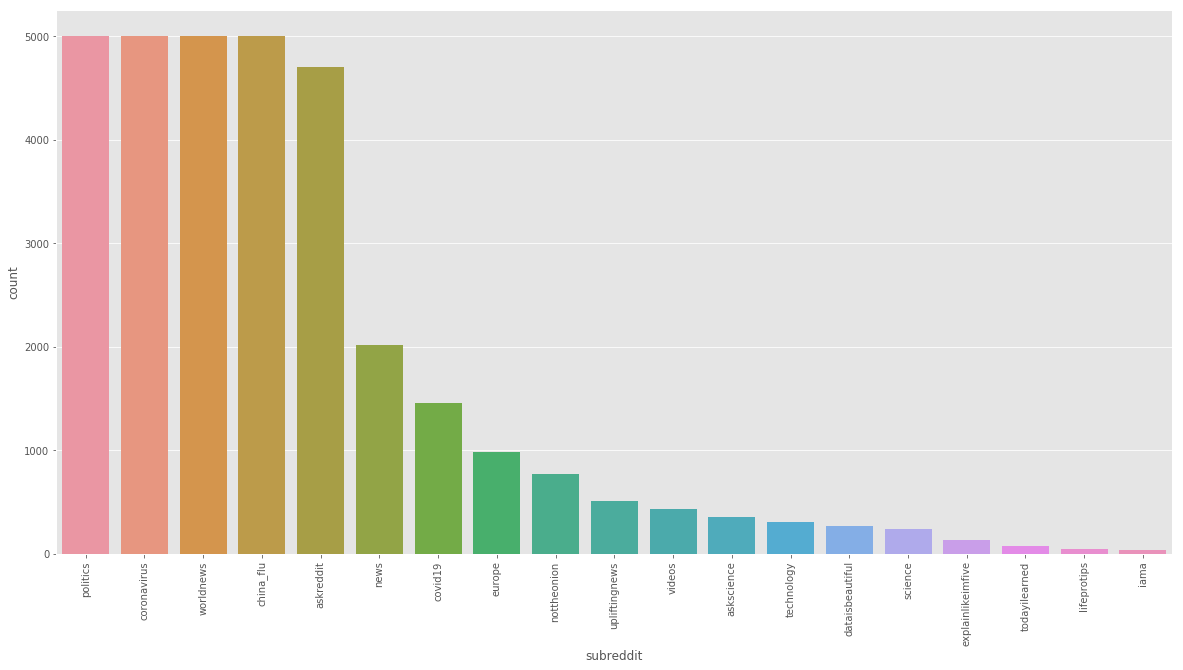

In [28]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
chart = sns.countplot(data=df,x='subreddit',ax=ax, order=df['subreddit'].value_counts().index)
ax.set_xticklabels(rotation=90,labels=ax.get_xticklabels())

plot_name = 'count_of_posts_per_subreddit'
plt.savefig(fname=VIS_DIR + plot_name)

Most subreddits have less than 1000 posts made over the four month period containing terms about the coronavirus. 
We also notice that the first four subreddits peak at 5000. The query on cypher was limited at 5000 for computational efficiency. It is likely that more posts had been made during that time.
Since there is such a discrepancy in volume of these subreddits we decide to continue the analysis with the 9 most popular subreddits. We decided to include a few non popular subreddits to monitor their behavior for further queries.


**IT FOLLOWS EXPONENTIAL DECAY. VICTORIZE THIS TEXT**

C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


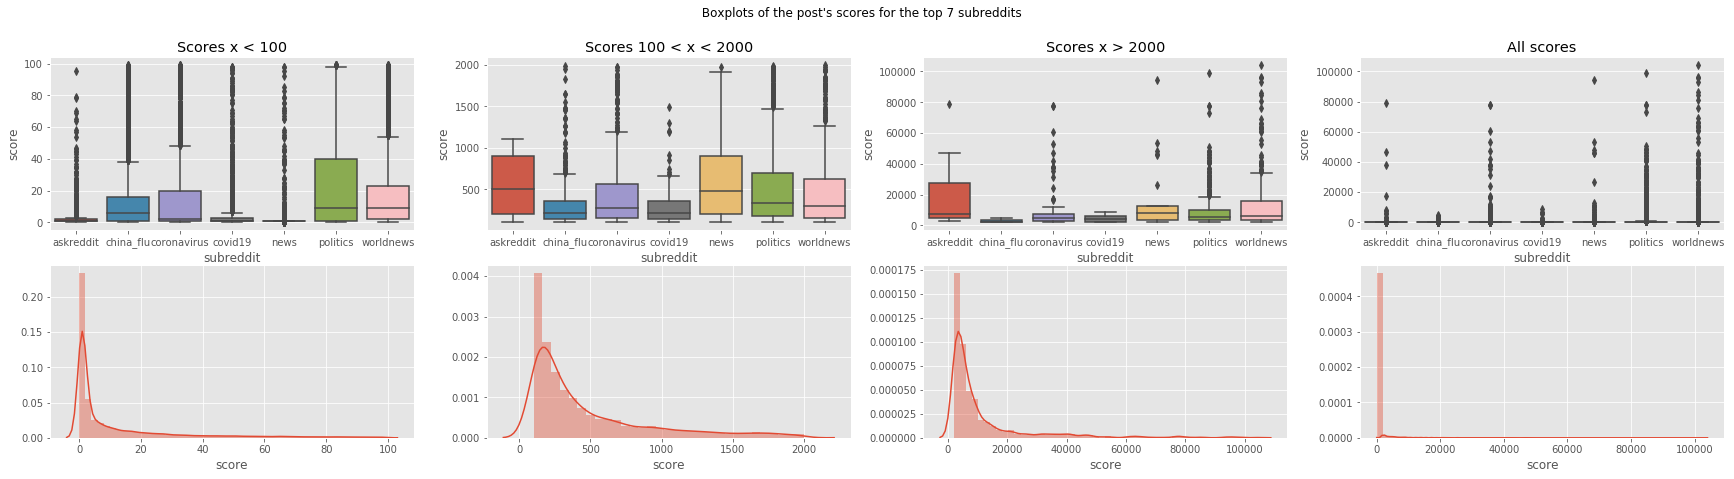

In [27]:
# Filter out the original dataframe to only contain the 7 most popular subreddits
top_7_subreddits = list(df['subreddit'].value_counts().index[0:7])
sub = df.loc[:,'subreddit']
df7 = df.loc[sub.isin(top_7_subreddits)]
df7_very_low_scores = df7.loc[(df7.loc[:,'score'] < 100)]
df7_low_scores = df7.loc[(df7.loc[:,'score'] < 2000) & (df7.loc[:,'score'] > 100)]
df7_high_scores = df7.loc[df7.loc[:,'score'] > 2000]

# Creating figures and axes
fig = plt.figure(figsize=(30,7))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)
ax8 = fig.add_subplot(2,4,8)


# Titles
fig.suptitle(" Boxplots of the post's scores for the top 7 subreddits")
ax1.set_title('Scores x < 100')
ax2.set_title('Scores 100 < x < 2000')
ax3.set_title('Scores x > 2000')
ax4.set_title('All scores')


# Boxplots
sns.boxplot(data=df7_very_low_scores,x='subreddit',y='score',ax=ax1)
sns.boxplot(data=df7_low_scores,x='subreddit',y='score',ax=ax2)
sns.boxplot(data=df7_high_scores,x='subreddit',y='score',ax=ax3)
sns.boxplot(data=df7,x='subreddit',y='score',ax=ax4)


# Countplots
sns.distplot(a=df7_very_low_scores.score, ax=ax5)
sns.distplot(a=df7_low_scores.score, ax=ax6)
sns.distplot(a=df7_high_scores.score, ax=ax7)
sns.distplot(a=df7.score, ax=ax8)

plot_name = 'boxplots_of_post_scores'
plt.savefig(fname=VIS_DIR + plot_name)

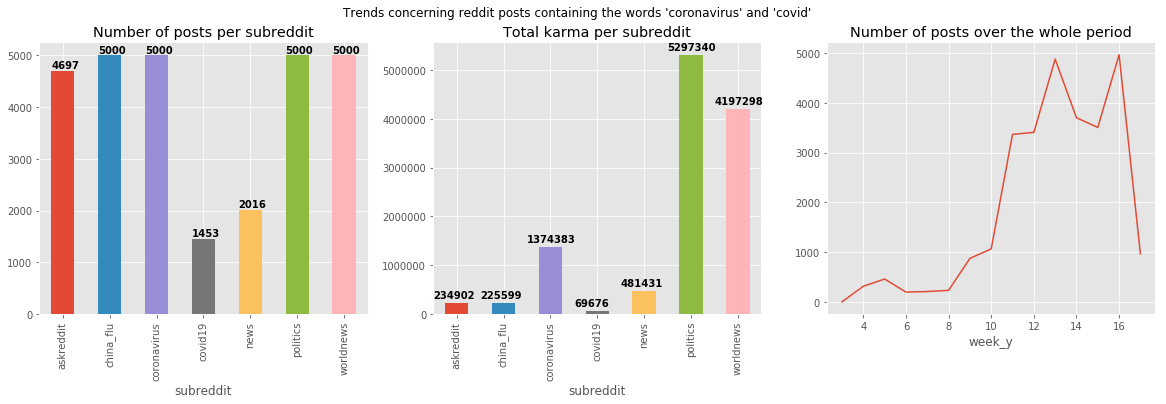

In [30]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
ax3= fig.add_subplot(1,3,3)


fig.suptitle("Trends concerning reddit posts containing the words 'coronavirus' and 'covid' " )
ax1.set_title('Number of posts per subreddit')
ax2.set_title('Total karma per subreddit')
ax3.set_title('Number of posts over the whole period')


df7.groupby(by='subreddit').count().score.plot(kind='bar',ax=ax1)
df7.groupby(by='subreddit').sum().score.plot(kind='bar',ax=ax2)
df7.groupby(by='week_y').count().score.plot(ax=ax3)


y1 = df7.groupby(by='subreddit').count().score.values
for i, v in enumerate(y1):
    ax1.text(x=i -0.25 ,y= v + 50 , s=str(v), color='black', fontweight='bold')
    
y2 = df7.groupby(by='subreddit').sum().score.values
for i, v in enumerate(y2):
    ax2.text(x=i -0.5 ,y= v + 100000 , s=str(v), color='black', fontweight='bold')
    
    
plot_name = 'trends_posts_containing_coronavirus_and_covid'
plt.savefig(fname=VIS_DIR + plot_name)

**Remark**

The plot below shows that we have data over the entire period. However the majority of the data comes from the latest months. we need more data

In [32]:
min(df.date.values)

'2020-01-14 19:28:14'

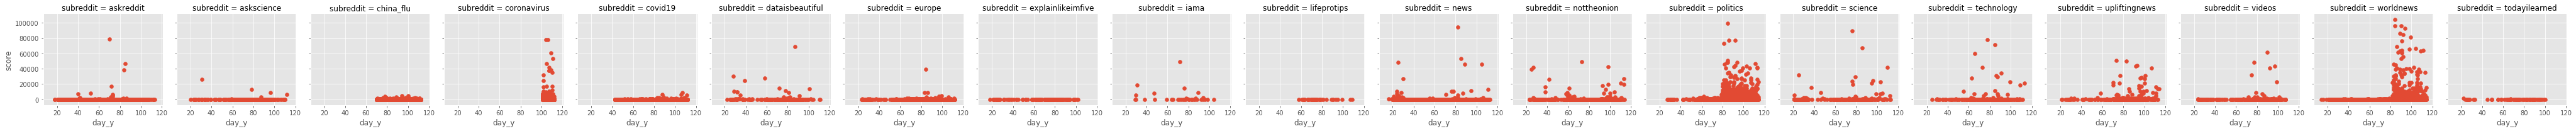

In [34]:
g = sns.FacetGrid(data=df,col='subreddit')
g = g.map(plt.scatter, 'day_y','score')
plot_name = 'facet_grid_subreddit_plot_days_vs_score'
plt.savefig(fname=VIS_DIR + plot_name)

## Repost analysis

In [36]:
reposts = list(set(df.loc[df.title.duplicated()].title.values))
df_reposts = df[df.title.isin(reposts)]

post_amount_t = df.shape[0]
repost_amount_u = len(reposts)
repost_amount_t = df_reposts.shape[0]
reposts_percentage_u = round(repost_amount_u / post_amount_t,2)
reposts_percentage_t = round(repost_amount_t / post_amount_t,2) 


print("Amount of posts in the dataframe:", post_amount_t)
print("Amount of unique reposts with the exact same title:",repost_amount_u)
print("Percentage of reposts", reposts_percentage_u,'%'  )
print("Total amount of reposts with the exact same title:",repost_amount_t)
print("Percentage of reposts", reposts_percentage_t,'%'  )





Amount of posts in the dataframe: 32303
Amount of unique reposts with the exact same title: 3179
Percentage of reposts 0.1 %
Total amount of reposts with the exact same title: 7952
Percentage of reposts 0.25 %


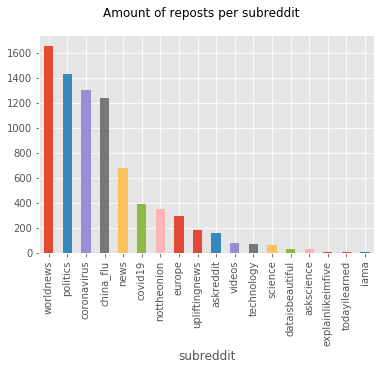

In [38]:
fig = plt.figure()
fig.suptitle('Amount of reposts per subreddit')
ax = fig.add_subplot(1,1,1)
df_reposts.groupby(by='subreddit').count().title.sort_values(ascending=False).plot(kind='bar',ax=ax)
plot_name = 'amount_of_reposts_per_subreddit'
plt.savefig(fname=VIS_DIR + plot_name)

In [ ]:
print(df.loc[df.loc[:,'title'] == 'Prince Charles tests positive for coronavirus'].shape)
df.loc[df.loc[:,'title'] == 'Prince Charles tests positive for coronavirus']

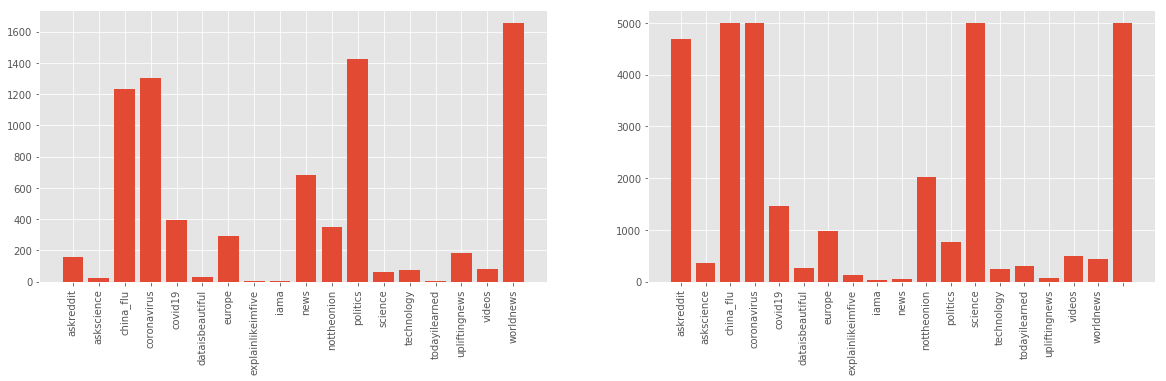

In [40]:
# TODO: Give this a title
# TODO: Give the saved plot a name 
# TODO: Color the categories
# TODO: Put two plots into one
# TODO: use the relatives instead of the absolute values

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

test = df_reposts.groupby(by='subreddit').count().title
ax1.bar(x= test.index,height=test.values)
ax1.set_xticklabels(rotation=90,labels=test.index)

test2 = df.groupby(by='subreddit').count().title
ax2.bar(x= test2.index,height=test2.values)
ax2.set_xticklabels(rotation=90,labels=test.index)


plot_name = 'work_in_progress'
plt.savefig(fname=VIS_DIR + plot_name)

There are a lot of reposts. How often does bullshit get reposted?

# Neo4J Queries

How often the article about prince charles is reposted

In [44]:
# TODO: ADD ALL NEO4J Queries

What is the most reposted article on covid containing bullshit

C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\delah\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


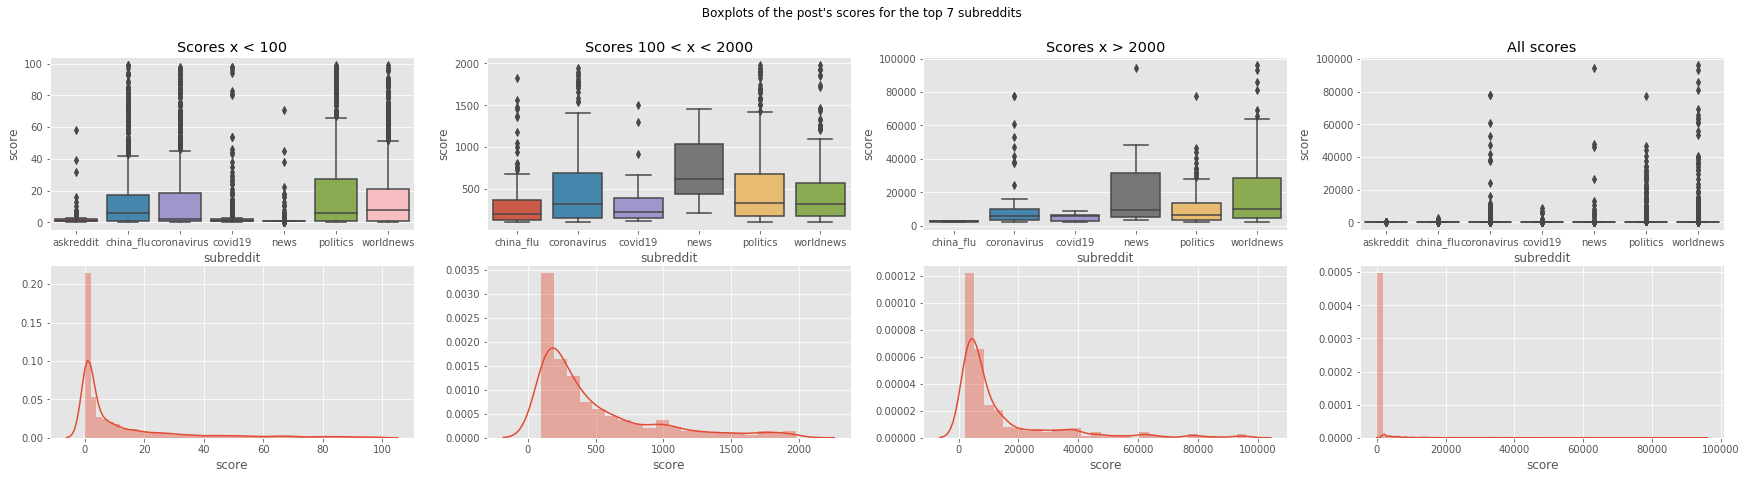

In [45]:
# Filter out the original dataframe to only contain the 7 most popular subreddits
top_7_subreddits = list(df['subreddit'].value_counts().index[0:7])
sub = df_reposts.loc[:,'subreddit']

#df7 = df.loc[sub.isin(top_7_subreddits)]
df7 = df_reposts.loc[sub.isin(top_7_subreddits)]
df7_very_low_scores = df7.loc[(df7.loc[:,'score'] < 100)]
df7_low_scores = df7.loc[(df7.loc[:,'score'] < 2000) & (df7.loc[:,'score'] > 100)]
df7_high_scores = df7.loc[df7.loc[:,'score'] > 2000]

# Creating figures and axes
fig = plt.figure(figsize=(30,7))
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
ax5 = fig.add_subplot(2,4,5)
ax6 = fig.add_subplot(2,4,6)
ax7 = fig.add_subplot(2,4,7)
ax8 = fig.add_subplot(2,4,8)


# Titles
fig.suptitle(" Boxplots of the repost's scores for the top 7 subreddits")
ax1.set_title('Scores x < 100')
ax2.set_title('Scores 100 < x < 2000')
ax3.set_title('Scores x > 2000')
ax4.set_title('All scores')


# Boxplots
sns.boxplot(data=df7_very_low_scores,x='subreddit',y='score',ax=ax1)
sns.boxplot(data=df7_low_scores,x='subreddit',y='score',ax=ax2)
sns.boxplot(data=df7_high_scores,x='subreddit',y='score',ax=ax3)
sns.boxplot(data=df7,x='subreddit',y='score',ax=ax4)


# Countplots
sns.distplot(a=df7_very_low_scores.score, ax=ax5)
sns.distplot(a=df7_low_scores.score, ax=ax6)
sns.distplot(a=df7_high_scores.score, ax=ax7)
sns.distplot(a=df7.score, ax=ax8)

plot_name = 'box_plot_of_repost_scores'
plt.savefig(fname=VIS_DIR + plot_name)

# 1 Separation of queries: 
We should find a way to return graphs of posts, users and subreddits, one subreddit at a time. This is computationally easier to handle for our pc's. The queries will be simpler, and it will be more manual work. However once we have all these separate files we can merge them together into a big connected graph. It is not clear to me yet which approach is easiest.
1.  Exporting all the data in a csv and merging the csv's together and importing the data into gephi OR
2.  Exporting the graphml files and merging them


# 2 Reducing Complexity of the database

## 2.1 User short list
Most users are shitposting karma-whoring people that have no real contribution to the platform. We should limit ourselves to highly contributing members. Francois and I discussed to approaches for this.
### 2.1.1 Subreddit driven approach: 
For each of the three main corona subreddits we need to return the top 100 posts with the highest karma. For these 300 posts we extract the users that made them. These are intensive reddit users that a high Impact within these three subreddits.


In [ ]:
HOME_DIR = 'C:\\Users\\delah\\Google Drive\\University\\KULeuven Master of Artificial Intelligence\\Courses\\Advanced Analytics in a Big Data World\\assignment 4\\csv\\' 
DATA_DIR = 'usershortlist'
os.chdir(HOME_DIR + DATA_DIR)

files = ['china_flu','coronavirus','covid19']

users = pd.DataFrame()
for file in files:
    temp = pd.read_csv(file)
    users = users.append(temp)
    
users = users.rename(columns={'p.title':'title','s.display_name':'subreddit','p.score':'score','u.username':'username'})


print("Users shape:", users.shape)
print(users.describe(), '\n')
print(users.info())
usernames = users.username.values
#print(usernames)  # print this to get the full list in Neo4J compatible format


users_n = users

In [ ]:
users.to_csv('users_shortlist.csv')

### 2.2.2 user driven approach: 
Return the list of users that have posted in all three subreddits, Of this list, take those with the highest karma.
There will be some overlap in users between the subreddit driven approach and the user driven approach which is good. The former emphasize highly contributing members within each community, while the latter emphasizes on members that connect communities (with or without reposts).

In [ ]:
HOME_DIR = 'C:\\Users\\delah\\Google Drive\\University\\KULeuven Master of Artificial Intelligence\\Courses\\Advanced Analytics in a Big Data World\\assignment 4\\csv\\' 
DATA_DIR = 'usershortlist'
os.chdir(HOME_DIR + DATA_DIR)

file = 'francoisshortlist'

users = pd.read_csv(file)
    
users = users.rename(columns={'my_N_Users':'username','cntDiffPosts':'post_count'})


print("Users shape:", users.shape)
print(users.describe(), '\n')
print(users.info())
usernames = users.username.values
#print(usernames)  # print this to get the full list in Neo4J compatible format


users_f = users

In [ ]:
print('Length of the user driven approach list:' + len(users_f.loc[:,['username']]))
print('Length of the subreddit driven approach list' + len(users_n.loc[:,['username']]))
users_master_list = users_f.loc[:,['username']].append(users_n.loc[:,['username']])
print('Length of both lists:' + len(users_master_list))
print('Length of both lists when removing duplicates' + len(set(users_master_list.values.flatten())))
users_master_list.to_csv('users_master_list.csv')

In [ ]:
usernames = list(set(users_master_list.values.flatten())) # print this to get the full list in Neo4J compatible format
#usernames

## 2.2 subreddits: 
There are too many subreddits to query. Even with our user's shorts, if we query all the posts they make and their respective subreddits we will have a data explosion. Only limiting ourselves to the three main subreddits seems too
limiting too. We limit our queries to the subreddits from a new shortlist I made based on the "Biggest subreddits" list I posted above. The new list is shorted and contains the 7 subreddits that have the most posts related to corona.

In [ ]:
subreddits

**Don't forget to add datascience and machinelearning**

## 2.3 posts:
While many subreddits like /r/news have fewer than 5000 posts made for the entire period of analysis, others like /r/coronavirus have 5000 posts just for the april period. Again the goal is here to filter on posts that cover the coronacrisis.
However we want to limit that pool even further to reduce the total complexity of the file.
       @François Chandelle Let me know what you think of this.
### 2.3.1 for the three mainsubreddits:
we export all the posts made by our shortlist of users


In [ ]:
posts.loc[:,['subreddit','title']].groupby('subreddit').sum().sort_values(by='title', ascending=False).reset_index() 

In [ ]:
total_posts_per_subreddit = posts.loc[:,['subreddit','title']].groupby('subreddit').count().sort_values(by='title',  ascending=False)
total_posts_per_subreddit = total_posts_per_subreddit.rename(columns={'title':'total_posts_per_user'}).reset_index() 

In [ ]:
total_scores_per_subreddit

In [ ]:
import pandas as pd
import os
HOME_DIR = 'C:\\Users\\delah\\Google Drive\\University\\KULeuven Master of Artificial Intelligence\\Courses\\Advanced Analytics in a Big Data World\\assignment 4\\csv\\' 
DATA_DIR = 'mainthreeposts'
os.chdir(HOME_DIR + DATA_DIR)


files = ['china_flu_complete','coronavirus_complete','covid19_complete']

posts = pd.DataFrame()
for file in files:
    temp = pd.read_csv(file)
    posts = posts.append(temp)

#Cleaning posts dataframe
posts = posts.rename(columns={'p.title':'title','s.display_name':'subreddit','p.score':'score','u.username':'username','u.link_karma':'link_karma','u.comment_karma':'comment_karma', 'p.created_utc_str':'date','p.upvote_ratio':'upvote_ratio'})
posts = dating_machine(posts)

#Saving Dataframe
#posts.to_csv('poststhreemainsubreddits_uncompleteshortlist_of_users.csv')


#Groupby's 
# Users
total_posts_per_user = posts.loc[:,['username','title']].groupby('username').count().sort_values(by='title',  ascending=False)
total_posts_per_user = total_posts_per_user.rename(columns={'title':'total_posts_per_user'}).reset_index() 
total_scores_per_user = posts.loc[:,['username','score']].groupby('username').sum().sort_values(by='score', ascending=False).reset_index() 
total_scores_per_user = total_scores_per_user.rename(columns={'score':'total_score_per_user'})

#Subreddit 
total_posts_per_subreddit = posts.loc[:,['subreddit','title']].groupby('subreddit').count().sort_values(by='title',  ascending=False)
total_posts_per_subreddit = total_posts_per_subreddit.rename(columns={'title':'total_posts_per_subreddit'}).reset_index() 
total_scores_per_subreddit = posts.loc[:,['subreddit','score']].groupby('subreddit').sum().sort_values(by='score', ascending=False).reset_index() 
total_scores_per_subreddit = total_scores_per_subreddit.rename(columns={'score':'total_scores_per_subreddit'})

posts = pd.merge(left=posts,right=total_posts_per_user,how='left',left_on='username',right_on='username')
posts = pd.merge(left=posts,right=total_scores_per_user,how='left',left_on='username',right_on='username')
posts = pd.merge(left=posts,right=total_posts_per_subreddit,how='left',left_on='subreddit',right_on='subreddit')
posts = pd.merge(left=posts,right=total_scores_per_subreddit,how='left',left_on='subreddit',right_on='subreddit')
posts['average_karma_per_post'] = posts.loc[:,'total_score_per_user'] / posts.loc[:,'total_posts_per_user']
posts.columns


#Saving Dataframe
posts.to_csv('poststhreemainsubreddits_complete_list_of_users.csv')
posts.columns


In [ ]:
posts.loc[:,['total_score_per_user']].values.flatten()[0] / posts.loc[:,['total_posts_per_user']].values.flatten()[0]

### 2.3.2 for the other subredditss: 
We only export the posts made by our shortlist of users containing the following keyswords: coronavirus, covid, chloroquine, masks, remdevisir and datadriven keywords found by victor

In [ ]:
#TODO: 

# Gephi converter
To create the final graph we need to convert our data to csv. We will need two types of files, csv containing the node infromation and csv's containing the relationship information. Below we create a csv for each


## Nodes table

In [ ]:
# Creating the nodes dataframe
nodes = posts.copy()

#Processing nodes
# Post nodes
nodes_post = nodes.loc[:,['p.id','title','date','score','upvote_ratio','month','month_n','day','day_y','day_w','week_y']]
nodes_post = nodes_post.rename(columns={'p.id':'Id','title':'Label'})
nodes_post = nodes_post.set_index(keys='Id')
# User nodes
nodes_user = nodes.loc[:,['u.id','username','link_karma','comment_karma','total_posts_per_user','total_score_per_user','average_karma_per_post']]
nodes_user = nodes_user.rename(columns={'u.id':'Id','username':'Label'})
nodes_user = nodes_user.set_index(keys='Id')
# Subreddit nodes
nodes_subreddit = nodes.loc[:,['s.id','subreddit','total_posts_per_subreddit','total_scores_per_subreddit']]
nodes_subreddit = nodes_subreddit.rename(columns={'s.id':'Id','subreddit':'Label'})
nodes_subreddit = nodes_subreddit.set_index(keys='Id')

## Relationships Table

In [ ]:
# Creating the relationships dataframe
relationships = nodes.loc[:,['u.id','s.id','p.id']]

# Processing relationships
# User to post relationships
rel_user_to_post = nodes.loc[:,['u.id','p.id']]
rel_user_to_post['Submitted'] = 'Submitted'
rel_user_to_post = rel_user_to_post.rename(columns={'u.id':'Source','p.id':'Target'})

# Post to Subreddit relationships
rel_post_to_subreddit = nodes.loc[:,['p.id','s.id']]
rel_post_to_subreddit['Submitted'] = 'Submitted'
rel_post_to_subreddit = rel_post_to_subreddit.rename(columns={'p.id':'Source','s.id':'Target'})

### Saving data

In [ ]:
os.chdir('C:\\Users\\delah\\Google Drive\\University\\KULeuven Master of Artificial Intelligence\\Courses\\Advanced Analytics in a Big Data World\\assignment 4\\csv\\mainthreeposts')

nodes_post.to_csv('nodes_post')
nodes_user.to_csv('nodes_user.csv')
nodes_subreddit.to_csv('nodes_subreddit.csv')

rel_user_to_post.to_csv('rel_user_to_post.csv')
rel_post_to_subreddit.to_csv('rel_post_to_subreddit.csv')

os.chdir('C:\\Users\\delah\\Google Drive\\University\\KULeuven Master of Artificial Intelligence\\Courses\\Advanced Analytics in a Big Data World\\assignment 4\\csv\\mainthreeposts')
